Ajuste Polinomial de Curvas
============================

Esse tutorial visa explicar os conceitos de *overfitting* e regulzarização. *Overfitting* ocorre quando
o modelo decora os dados de entrada, de forma que o modelo se torne incapaz de generalizar para novos
dados. Regulzarização é uma técnica para evitar o overfitting.

O tutorial é uma adaptação do exemplo apresentado no capítulo 1 do livro:
"Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag New York, Inc., Secaucus, NJ, USA."


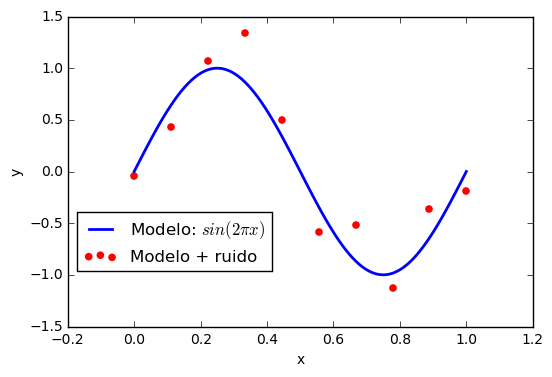

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import *

#Variância do ruído
var = 0.3

#Conjunto de treino
train_size = 10
x_train = np.linspace(0,1,train_size)
y_train = np.sin(2*np.pi*x_train) + np.random.normal(0,var,train_size) #sinal + ruido

#Conjunto de teste
test_size = 100
x_test= np.linspace(0,1,test_size)
y = np.sin(2*np.pi*x_test)
y_test = y + np.random.normal(0,var,test_size) #sinal + ruido

plt.figure()
plt.plot(x_test,y,linewidth = 2.0,label = r'Modelo: $sin(2 \pi x)$')
plt.scatter(x_train,y_train,color='red',label = "Modelo + ruido")
plt.legend(loc = (0.02, 0.18))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Dados 
=========

Observações: $$\boldsymbol{x} =(x_1,x_2,...,x_N)^T$$
Alvo:  $$\boldsymbol{t} =(t_1,t_2,...,t_N)^T$$


Modelo
=========
$$y(x,\boldsymbol{w})= w_0 + w_1x +w_2x^2+...+w_mx^m = \sum^M_{j=0}w_jx^j$$

Função de custo 
===============

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2$$


In [24]:
def polynomial_fit(x,y,M):
    A = np.power(x.reshape(-1,1),np.arange(0,M+1).reshape(1,-1))
    y = y.reshape(-1,1)
    w = np.dot(np.linalg.pinv(A),y)
    return w.ravel()

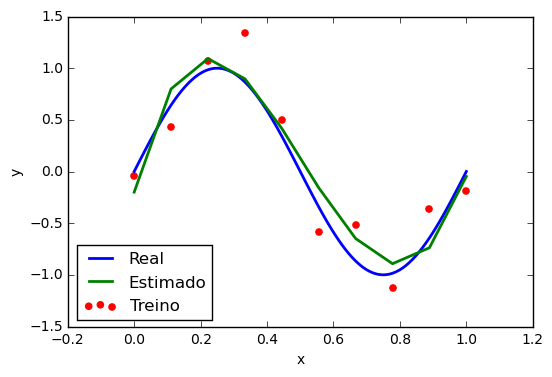

In [35]:
def plotmodel(M):
    coefs = polynomial_fit(x_train, y_train, M)[::-1]
    p = np.poly1d(coefs)
    plt.figure()
    plt.plot(x_test,y,linewidth = 2.0,label = 'Real')
    plt.scatter(x_train,y_train,color='red',label= "Treino")
    plt.xlabel("x")
    plt.ylabel(r'y')
    y_fit = p(x_train) 
    plt.plot(x_train,y_fit,linewidth = 2.0,label ="Estimado")
    plt.legend(loc=(0.02,0.02))
interact(plotmodel,M=(0,9,1))  

Erro médio quadrático
=======================
$$E_{RMS}=\sqrt{2E(\boldsymbol{w*})/N}$$

Nós queremos encontrar os pesos **w** que minimizam o erro **E(w)**.

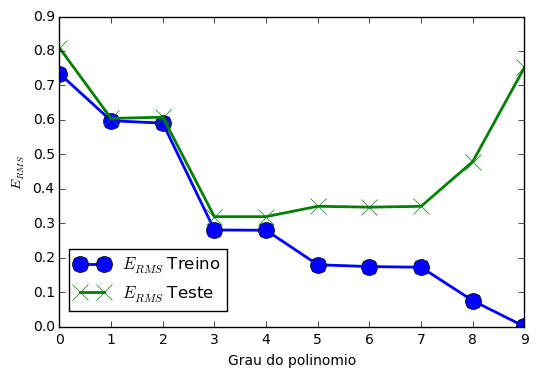

In [64]:
def rms_error(x_train,y_train,x_test,y_test,M):
    coeffs = polynomial_fit(x_train,y_train,M)[::-1]
    p = np.poly1d(coeffs)
    y_fit_train = p(x_train)
    y_fit_test = p(x_test)
    error_train = np.sqrt(((y_train - y_fit_train)**2/y_train.size).sum())
    error_test = np.sqrt(((y_test - y_fit_test)**2/y_test.size).sum())
    return error_train, error_test
   
M = range(10)
train = []
test = []
for m in M:
    error_train, error_test = rms_error(x_train,y_train,x_test,y_test,m)
    train.append(error_train)
    test.append(error_test)


plt.figure()
plt.plot(M,train,linewidth = 2.0,marker = 'o',markersize = 12,label = r'$E_{RMS}$ Treino')
plt.plot(M,test,linewidth = 2.0,marker = 'x',markersize = 12,label = r'$E_{RMS}$ Teste')
plt.legend(loc = (0.02, 0.05))
plt.xlabel("Grau do polinomio")
plt.ylabel(r'$E_{RMS}$')
#plt.yscale('log')
plt.show()

Função de custo com regularização 
====================================

$$E(\boldsymbol{w})=\frac{1}{2}\sum_{n=1}^N\{y(x_n,\boldsymbol{w})-t_n\}^2 +\frac{\lambda}{2}||\boldsymbol{W}||$$